In [1]:
# import necessary libraries
import pandas as pd # data handling
import matplotlib.pyplot as plt # visualization
from sklearn.model_selection import train_test_split  # splitting dataset
from sklearn.ensemble import RandomForestClassifier  # training Random Forest classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluating model performance

In [2]:
# load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('balloons.csv')
print(df.head()) # test opening the file

    Color   size      act    age inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        T
2  YELLOW  SMALL      DIP  ADULT        T
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  SMALL      DIP  CHILD        F


In [3]:
# define the target variable
y = df['inflated']

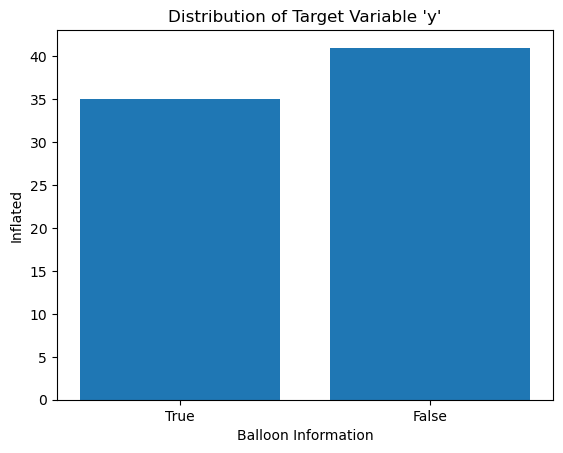

In [4]:
# plot the distribution of the target variable
plt.bar([1, 2], [len(y[y == 'T']), len(y[y == 'F'])], tick_label=['True', 'False'])
plt.title("Distribution of Target Variable 'y'")
plt.xlabel("Balloon Information")
plt.ylabel("Inflated")
plt.show()

In [5]:
# convert all categorical variables in dataset to numeric
for col in df.columns:
    labels, uniques = pd.factorize(df[col]) # assign unique integers to each category
    df[col] = labels # replace orogical column values with the integer

y = df['inflated'] # define the target variable
X = df.drop(columns='inflated') # define the feature variables

# split the data into training and test sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# train the Random Forest Classifier model on the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# evaluate the trained Random Forest model by generating predictions
predictions = rfc.predict(X_test)

# calculate and print the accuracy of the model
print("accuracy score:", accuracy_score(y_test, predictions))

# calculate and print the confusion matrix
print("confusion matrix:\n", confusion_matrix(y_test, predictions))

# Based on the accuracy score and confusion matrix the performance of the random forest classification model
# is pretty good. However, when I tested out different maximum depths, it did not change the accuracy score 
# or confusion matrix. On the other hand, I tested the Random Forest model with four different number of 
# trees: 50, 100, 250, and 500. The highest accuracy and best confusion matrix was with 100 trees with the 
# score shown below in the output and the rest all had approximately 0.79.

accuracy score: 0.8947368421052632
confusion matrix:
 [[ 6  1]
 [ 1 11]]
